In [35]:
import warnings
warnings.filterwarnings('ignore')  

In [36]:
import tensorflow as tf
print(tf.__version__)

1.4.0


In [37]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn
import seaborn as sns
print(sklearn.__version__)

0.19.1


[5 5 5 ... 6 5 6]


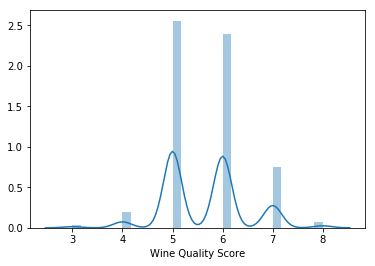

In [38]:
Class_type = 'multi-class'

if Class_type == 'multi-class':
    dataset = pd.read_csv("winequality-red.csv")
    avg = 'weighted'
elif Class_type == 'binary':
    dataset = pd.read_csv("winequality-red-binary.csv")
    avg = 'binary'

X_cols = list(dataset.columns)
del(X_cols[-1])

col1 = 0
col2 = 11

X = dataset.iloc[:,col1:col2].values
y = dataset.iloc[:,-1].values


In [39]:
from sklearn.model_selection import train_test_split
X_train_old, X_test_old, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=0)

In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


### Classifiers and Their Parameter Grids For the Grid Search Algorithm ###

cfs = [LogisticRegression(),
       KNeighborsClassifier(),
       SVC(),
       DecisionTreeClassifier(),
       RandomForestClassifier()
       ]

cf_title = ['Logistic Regression',
            'K-Nearest Neighbors',
            'Kernel SVM', 
            'Decision Tree', 
            'Random Forest']

In [41]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel

In [42]:
#Use extratrees and selectfrommodel to isolate the most important features for classification
feature_list = []

print('Old shape of dataset = ')
print(X_train_old.shape)

featmodel = ExtraTreesClassifier(n_estimators=100)
featmodel = featmodel.fit(X_train_old,y_train)
print("feature importances: ", featmodel.feature_importances_)
model = SelectFromModel(featmodel,prefit=True)
feature_idx = model.get_support(indices = True)
for i in feature_idx:
    feature_list.append(X_cols[i])
print('Features: ', X_cols)

X_train = model.transform(X_train_old)
X_test = model.transform(X_test_old)

print('New shape of dataset = ', X_train.shape)
print('Selected Features:', feature_list) 

Old shape of dataset = 
(1119, 11)
feature importances:  [0.07898533 0.10130254 0.08000881 0.07855496 0.07423786 0.07827057
 0.10016022 0.08204684 0.07782588 0.10386834 0.14473864]
Features:  ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']
New shape of dataset =  (1119, 4)
Selected Features: ['volatile acidity', 'total sulfur dioxide', 'sulphates', 'alcohol']


In [43]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [44]:
from sklearn.model_selection import learning_curve, cross_validate
from sklearn.model_selection import StratifiedKFold

acc=[]
ps=[]
rs=[]
f_1=[]

cv = StratifiedKFold(n_splits=5)

scoring = {'acc': 'accuracy',
           'prec_weight': 'precision_weighted',
           'rec_weight': 'recall_weighted',
          'f1_weight': 'f1_weighted'}

def plot_learning_curve(estimator, title, X, y, axes=None, ylim=None, cv=cv,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):

    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")

    train_sizes, train_scores, test_scores= \
        learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs,
                       train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)


    # Plot learning curve
    plt.grid()
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1,
                         color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")
    plt.legend(loc="best")
    
    
for classifier in range(0, len(cfs)):
    
    
    scores = cross_validate(estimator = cfs[classifier], X = X_train, y = y_train,scoring=scoring, cv = cv)
    
    acc.append(np.mean(scores['test_acc']))
    ps.append(np.mean(scores['test_prec_weight']))
    rs.append(np.mean(scores['test_rec_weight']))
    f_1.append(np.mean(scores['test_f1_weight']))
    
    print('### Accuracy/Precision/Recall/F1 ###')
    print('\n')
    print('The accuracy for the '+cf_title[classifier]+' classifier was: '+str(acc[classifier])) 
    print('The precision for the '+cf_title[classifier]+' classifier was: '+str(ps[classifier])) 
    print('The recall for the '+cf_title[classifier]+' classifier was: '+str(rs[classifier]))
    print('The f1 score for the '+cf_title[classifier]+' classifier was: '+str(f_1[classifier]))
    print('\n')
    print('==================================================================================')
    
    y_pred = None

### Accuracy/Precision/Recall/F1 ###


The accuracy for the Logistic Regression classifier was: 0.5764776924953916
The precision for the Logistic Regression classifier was: 0.5473325045436364
The recall for the Logistic Regression classifier was: 0.5764776924953916
The f1 score for the Logistic Regression classifier was: 0.5445384769525053


### Accuracy/Precision/Recall/F1 ###


The accuracy for the K-Nearest Neighbors classifier was: 0.5622222850364443
The precision for the K-Nearest Neighbors classifier was: 0.5459637220054716
The recall for the K-Nearest Neighbors classifier was: 0.5622222850364443
The f1 score for the K-Nearest Neighbors classifier was: 0.5480013591080379


### Accuracy/Precision/Recall/F1 ###


The accuracy for the Kernel SVM classifier was: 0.577407521761504
The precision for the Kernel SVM classifier was: 0.5542887598057031
The recall for the Kernel SVM classifier was: 0.577407521761504
The f1 score for the Kernel SVM classifier was: 0.5535654122791054


### Ac